<a href="https://colab.research.google.com/github/wfxronald/chartasis/blob/master/chartasis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files

In [2]:
uploaded = files.upload()

Saving cleaned.csv to cleaned.csv


In [24]:
import io
import pandas as pd
import numpy as np
df = pd.read_csv(io.BytesIO(uploaded['cleaned.csv']))
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)

In [27]:
df.dtypes
df.astype({'bpm': 'int64'}).dtypes

title             object
artist            object
bpm                int64
length            object
category          object
mode              object
level              int64
measure_count      int64
notes_count        int64
jumps_count        int64
brackets_count     int64
dtype: object

In [28]:
df.head()

,title,artist,bpm,length,category,mode,level,measure_count,notes_count,jumps_count,brackets_count
0,Wicked Legend,D_AAN,150.0,ARCADE,ORIGINAL,S,10,65,886,44,0
1,Wicked Legend,D_AAN,150.0,ARCADE,ORIGINAL,S,15,65,1469,69,2
2,Wicked Legend,D_AAN,150.0,ARCADE,ORIGINAL,S,19,65,1783,54,30
3,Wicked Legend,D_AAN,150.0,ARCADE,ORIGINAL,D,12,65,881,58,0
4,Wicked Legend,D_AAN,150.0,ARCADE,ORIGINAL,D,18,65,1558,44,3


In [5]:
single = df.loc[df['mode'] == 'S']
single.head()

,title,artist,bpm,length,category,mode,level,measure_count,notes_count,jumps_count,brackets_count
0,Wicked Legend,D_AAN,150.0,ARCADE,ORIGINAL,S,10,65,886,44,0
1,Wicked Legend,D_AAN,150.0,ARCADE,ORIGINAL,S,15,65,1469,69,2
2,Wicked Legend,D_AAN,150.0,ARCADE,ORIGINAL,S,19,65,1783,54,30
6,Starry Night - FULL SONG -,MAMAMOO,124.0,FULLSONG,K-POP,S,12,108,1008,50,0
7,Starry Night - FULL SONG -,MAMAMOO,124.0,FULLSONG,K-POP,S,17,108,2196,78,24


In [6]:
from matplotlib.pyplot import scatter

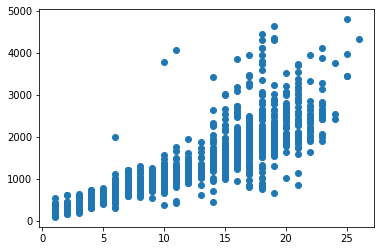

In [8]:
exclude_outlier = single.loc[single['notes_count'] < 5000]
scatter(exclude_outlier['level'], exclude_outlier['notes_count'])

In [9]:
from scipy.stats import pearsonr
pearsonr(exclude_outlier['level'], exclude_outlier['notes_count'])

(0.8549628736069778, 0.0)

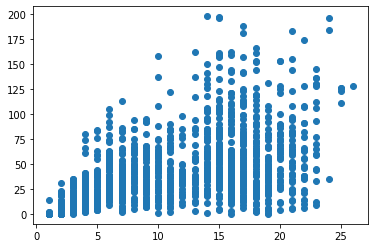

In [12]:
exclude_jump_outlier = single.loc[single['jumps_count'] < 200]
scatter(exclude_jump_outlier['level'], exclude_jump_outlier['jumps_count'])

In [13]:
pearsonr(exclude_jump_outlier['level'], exclude_jump_outlier['jumps_count'])

(0.5048604711107081, 2.3400569485516753e-86)

In [15]:
from sklearn.linear_model import LinearRegression

In [33]:
df_cleaned = df.loc[df['notes_count'] < 5000]

X = df_cleaned[['notes_count', 'jumps_count', 'brackets_count', 'bpm']]
y = df_cleaned['level']
reg = LinearRegression().fit(X, y)
reg.score(X, y)

0.6915904302221905